In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
import tweepy 
from tweepy import OAuthHandler
# auth hadler is to authentication and authorization to twitter
from tweepy import Stream
# stream will fetch live data and it will take a object to write data
from tweepy import StreamListener
# it is stream listener class which will get data from twitter
# it will call on_data method whenever it gets tweets
# it will call on_error method whenever error comes
consumer_key = "SrLW2zfM0OyLGvYNNcFrYzxDr"
consumer_secret = "XvtEXoytn3yt8JBFOjw6SME7CuzK7OrvMpDPi1b5bstGa6SP0u"

access_token  = "1148898544343908353-CYnIwZoqadfRyUB1JsaJpegJ0HHatj"
access_secret = "LI8KseED7Je5TqbdrXgMpW6dX2F2p0Klk6KcUZ91ZuUYy"

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
class Fetch_Data(StreamListener):
    def on_data(self,tweet):
        #print(tweet)
        fp = open("Prog_lang.json","a")
        fp.write(tweet)
        fp.close()
    def on_error(self,error):
        print(error, "Error")
        
fetch = Fetch_Data()

stream = Stream(auth,fetch)
# Stream will authentication and fetch data and feed into fetch.on_data
# or fetch.on_error methods accordingly
stream.filter(track=["python","java","c","c++","javascript","ruby"])
# list of topicks to fetch relvent tweets about those topics

ProtocolError: ('Connection broken: OSError("(10054, \'WSAECONNRESET\')")', OSError("(10054, 'WSAECONNRESET')"))

In [15]:
fp = open("Prog_lang.json")
line = fp.readline()
line[:100]

'{"created_at":"Wed Jul 10 10:55:17 +0000 2019","id":1148908546605625344,"id_str":"114890854660562534'

In [16]:
import json 

data = json.loads(line)
print(type(data))

<class 'dict'>


In [17]:
print(*data.keys(),sep='\n')

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
extended_entities
favorited
retweeted
possibly_sensitive
filter_level
lang
timestamp_ms


In [18]:
data

{'created_at': 'Wed Jul 10 10:55:17 +0000 2019',
 'id': 1148908546605625344,
 'id_str': '1148908546605625344',
 'text': 'RT @Elta_Lbac: #PS4share\n\nhttps://t.co/sN7Lk7xhSn https://t.co/uPhPJ4FsQi',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1052120457036599296,
  'id_str': '1052120457036599296',
  'name': 'll J0ao LBAC ll',
  'screen_name': 'll_J0ao_LBAC',
  'location': 'Dordogne, Aquitaine',
  'url': None,
  'description': 'Chef de @lbacteam\nWC:1x400$\nrecord kill:\nsolo solo :17\nsolo duo :24 \nsolo squad :22\ntrio with : @???et @ ???\n\n16 years joueur spécialité classique',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 75,
  'friends_count': 84,
  'listed_count': 0,
  'favourites

In [23]:
fp = open("Prog_lang.json")
lang = [] ## lang list contain list of all tweets, in dictionay form
for line in fp : 
    try : 
        obj = json.loads(line)
        lang.append(obj)
    except : 
        continue
len(lang)

1663

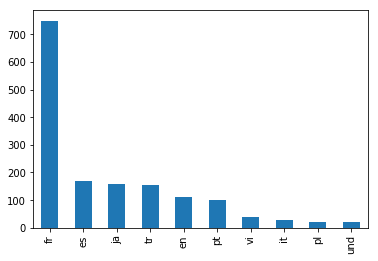

In [24]:
l = []
for tweet in lang : 
    try :
        l.append(tweet['lang'])
    except : 
        continue 
s  = pd.Series(l)
s.value_counts()[:10].plot(kind='bar')

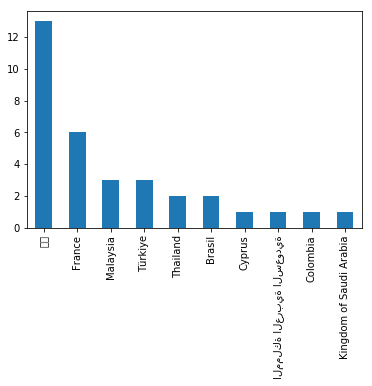

In [25]:
c = []
for tweet in lang : 
    try :
        c.append(tweet['place']['country'])
    except : 
        continue 
s  = pd.Series(c)
s.value_counts()[:10].plot(kind='bar')

In [32]:
for tweet in lang :
    try : 
        if tweet['lang'] == 'en' :
            print("\n")
            print(tweet['text'])
            print("\n","**"*60)
    except : 
        continue



RT @teachableknower: @DrChiemeziem @MBuhari I said this yesterday o that they formed operation python on top IPOB that did the protesting i…

 ************************************************************************************************************************


Don't worry about the Southern District of New York getting you when you leave D.C.  Donald you can become a Commun… https://t.co/7qQ0DOOkRh

 ************************************************************************************************************************


Director, Office of Pollution Prevention and Toxics  - Washington D .C. - Environmental Protection Agency  https://t.co/zdrsNJJvqB

 ************************************************************************************************************************


📊 MARKET MOVER..

Today's DARK HORSE is into 7/2 from 12/1..

 ************************************************************************************************************************


RT @QuantInsti: From eve

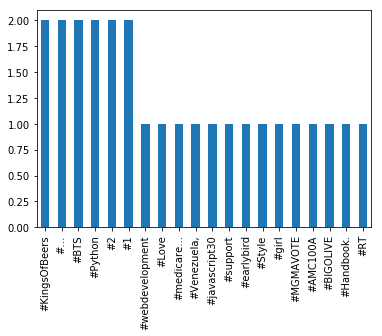

In [33]:
h = []
for tweet in lang : 
    try :
        if tweet['lang'] == 'en' :
            h.extend([ tag for tag in tweet['text'].split() if "#" in tag ])
    except : 
        continue 
s  = pd.Series(h)
s.value_counts()[:20].plot(kind='bar')

In [35]:
trend = {
    'python' : 0,
    'java' : 0,
    'cpp':0,
    'javascript' : 0,
    'ruby' : 0
}

for tweet in lang : 
    try :
        data = tweet['text'].lower()
        if 'python' in data:
            trend['python'] += data.count('python')
        if 'java' in data :
            trend['java'] += data.count('java')
        if 'c++' in data :
            trend['cpp'] += data.count('c++')
        if 'javascript' in data :
            trend['javascript'] += data.count('javascript')
        if 'ruby' in data : 
            trend['ruby'] += data.count('ruby')    
    
    except : 
        continue 
s  = pd.Series(trend)
s

python        8
java          6
cpp           0
javascript    2
ruby          1
dtype: int64

In [36]:
lang = list(s.index)
value = list(s.values)
lang

['python', 'java', 'cpp', 'javascript', 'ruby']

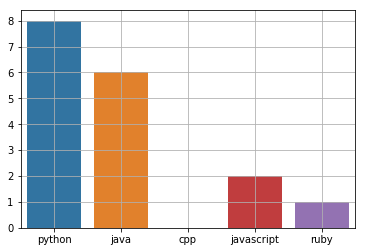

In [37]:
sns.barplot(x=lang,y=value)
plt.grid()
plt.show()